# Analysis of UEFA Euro Cup Matches

## 1. Introduction

The UEFA European Football Championship, commonly known as the UEFA European Championship and informally as the Euros, is the primary association football competition contested by the senior men's national teams of the members of the Union of European Football Associations (UEFA), determining the continental champion of Europe. Held every four years since 1960, in the even-numbered year between World Cup tournaments, it was originally called the European Nations' Cup, changing to the current name in 1968. Starting with the 1996 tournament, specific championships are often referred to in the form "UEFA Euro"; this format has since been retroactively applied to earlier tournaments.
Prior to entering the tournament, all teams other than the host nations (which qualify automatically) compete in a qualifying process. Until 2016 the championship winners could compete in the following FIFA Confederations Cup, but were not obliged to do so. 
The 15 European Championship tournaments have been won by ten national teams: Germany and Spain each have won three titles, France has two titles, and the Soviet Union, Italy, Czechoslovakia, Netherlands, Denmark, Greece and Portugal have won one title each. To date, Spain is the only team in history to have won consecutive titles, doing so in 2008 and 2012. It is the second most watched football tournament in the world after the FIFA World Cup. The Euro 2012 final was watched by a global audience of around 300 million.
The most recent championship, hosted by France in 2016, was won by Portugal, who beat France 1–0 in the final at the Stade de France in Saint-Denis after extra time. The final also attracted 284 million viewers which is the second most viewed game in European tournament history.
Source(https://en.wikipedia.org/wiki/UEFA_European_Championship)

## 2. Data description

In the whole history of UEFA played a lot matches, after FIFA World Cup the most popular cup and therefore it is famous cup which plays 1 time for 4 years. All European countries which qualified plays in this cup. 
Analysis was based on all matches from since 1960 due 2016. Below is data that we will be scraped and used for our analysis:

Date – Date of the matches

Time – Time of the matches

HTN – Home team name 

ATN – Away team name

HTG – Home team goals

ATG – Away team goals

Attendance – how many people was in match

Year – Year of the match

PlayerName – Name of Player

Goals - Goals of Players

TS – Top scorers of Cup history

## 3. Research questions

In this project, I will focus on several parts of data like:

Analyze the TOP 10 scorers of Cup

Analyze the attendance of Cup

Analyze the Home team goals per match of each Cup

Analyze the Away team goals per match of each Cup

Analyze the positions of players

## 4. Data manipulation

Drop columns that we will not use

check for the inconsistencies

In [93]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#import datasets
df1=pd.read_csv('Uefa Euro Cup All Matches.csv')
df2=pd.read_csv('Uefa Euro Cup All Players.csv')
df1.head(5)
df2.head(5)

#drop columns that don't needed
drop = (['Caps','Club','ShirtNumber'])
df2.drop(drop, axis = 'columns', inplace = True)

drop = (['Stage','SpecialWinConditions','Stadium','City'])
df1.drop(drop, axis = 'columns', inplace = True)

I have dropped some columns from two data frames.

I need to check in Data frame 1 is there any NaN values

In [30]:
#Check for NaN values
df1.isnull().any()

Date             False
Time             False
HomeTeamName     False
AwayTeamName     False
HomeTeamGoals    False
AwayTeamGoals    False
Attendance       False
Year             False
dtype: bool

In the first data frame i have no missed data values

I need to check Data frame 2 for Nan values

In [31]:
#Checking for NaN values
df2.isnull().any()

Position               False
PlayerName(Captain)    False
Goals                   True
Country                False
Year                   False
dtype: bool

As we can see, there is NaN values in Goals column

In [32]:
df2.isnull().sum()

Position                  0
PlayerName(Captain)       0
Goals                  2102
Country                   0
Year                      0
dtype: int64

We have 2102 NaN values, so we need to change them by 0 for fututre analysis

In [33]:
df2.shape

(3410, 5)

In the second data frame we have 3410 rows. But, in this rows 2102 rows have NaN values, so we need to replace them by 0

In the second i have NaN values in the Goals column, but it should be zero. If there NaN values, that mean player didn't score, so we conclude it should be 0

In [34]:
#NaN replaced by 0
df2.replace("0",np.nan, inplace = True)

In [35]:
#Show the data frame 2
df2.head()

,Position,PlayerName(Captain),Goals,Country,Year
0,GK,Justín Javorek,NaN,Czechoslovakia,1960
1,GK,Viliam Schrojf,NaN,Czechoslovakia,1960
2,DF,Ladislav Novák ( captain ),NaN,Czechoslovakia,1960
3,DF,Ján Popluhár,NaN,Czechoslovakia,1960
4,DF,František Šafránek,NaN,Czechoslovakia,1960


I have changed the NaN to 0

I need to check is there any duplicate values in my dataframes

In [36]:
#Checking for duplicates
print(df1.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool


In [37]:
#Checking for duplicates
print(df2.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3405    False
3406    False
3407    False
3408    False
3409    False
Length: 3410, dtype: bool


There is no duplicated values

## 5. Data visualisation

In this part i will answer to my research questions and represent it in graphs

#### 5.1 Analyze the TOP 10 scorers of Cup:

Data preparation:
* We will prepare out table for barplot
* Visualizate it in barplot

In [38]:
#Create a dataframe for analyzing total goals of each player
goal_df = df2[["PlayerName(Captain)", "Goals"]]

#Apply groupby on players to show only Goals and Players
goal_grouped = goal_df.groupby("PlayerName(Captain)", as_index = False).mean()

goal_grouped.head()

,PlayerName(Captain),Goals
0,Aaron Hughes,1.0
1,Aaron Ramsey,10.0
2,Abdullah Ercan,NaN
3,Abel Xavier,NaN
4,Abelardo,NaN


In [39]:
df_top10=df2[['PlayerName(Captain)','Goals']]

#Sort players for the top 10 scorers
df_top10_sorted=df_top10.sort_values(by='Goals', ascending=False).iloc[:10]
df_top10_sorted

,PlayerName(Captain),Goals
3281,Robbie Keane ( captain ),67.0
2638,Miroslav Klose,64.0
3304,Zlatan Ibrahimović ( captain ),62.0
3324,Cristiano Ronaldo ( captain ),58.0
2130,Jan Koller,54.0
2729,Robbie Keane ( captain ),53.0
2959,Wayne Rooney ( captain ),52.0
3051,Lukas Podolski,48.0
2772,Andriy Shevchenko ( captain ),48.0
2317,Thierry Henry,44.0


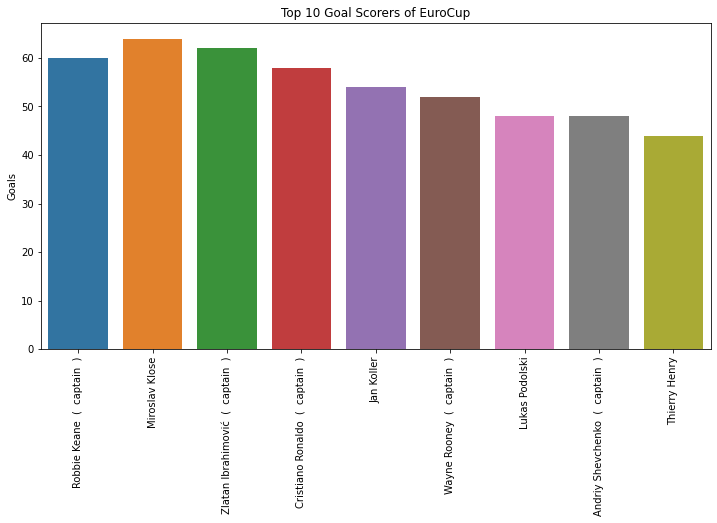

In [40]:
#Visualisation code
fig, ax = plt.subplots(figsize=(12,6))

#Plot barplot
sns.barplot(x="PlayerName(Captain)",y= "Goals",data =df_top10_sorted , ax=ax , ci=None)

#Set plot's characteristics
ax.set(xlabel='', ylabel='Goals', title = "Top 10 Goal Scorers of EuroCup")

plt.xticks(rotation=90)
plt.show()

#### Comments:


There is Top 10 scorers of EuroCup and all of them are Forwards, so we can analyze that forwards are the scorers of each team.

#### 5.2 Analyze the attandence of Cup
* We will prepare out table for barplot
* Visualizate it in barplot

In [41]:
#Preparing code and taking only attendace and Year
df_att=df1[['Attendance','Year']]

#Group rows by Year and sum
df_att_grouped = df_att.groupby("Year", as_index = False).sum()
df_att_grouped

,Year,Attendance
0,1960,78958
1,1964,156253
2,1968,260936
3,1972,106578
4,1976,106087
5,1980,350655
6,1984,599655
7,1988,849844
8,1992,430241
9,1996,1276171


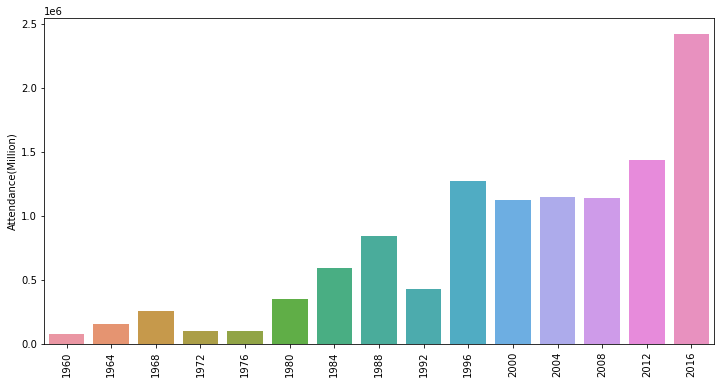

In [90]:
#Visualisation code
fig, ax = plt.subplots(figsize=(12,6))

#Plot barplot
sns.barplot(x="Year",y= "Attendance",data =df_att_grouped , ax=ax , ci=None)

#Set plot's characteristics
ax.set(xlabel='', ylabel='Attendance(Million)')

plt.xticks(rotation=90)
plt.show()

#### Comments:

The attendance of EuroCup is growing and we can analyze that attendance may connect with historical situations, because in 1992 the attendance was too small, even if it starts constantly grow after 1980. In the 2016 was record attendace, it may connect with more easy travel around the world.

#### 5.3 Analyze away team goals per match
* We will prepare out table for scatterplot
* Visualizate it in scatterlot

In [86]:
#Preparing code and taking only goals and teams
df_ATG=df1[['AwayTeamGoals','AwayTeamName']]

#Group rows by Team Name
df_ATG_grouped = df_ATG.groupby("AwayTeamName", as_index = False).mean().rename(columns={'AwayTeamName':'TeamName'})
print(df_ATG_grouped)


                TeamName  AwayTeamGoals
0                Albania       0.500000
1                Austria       0.500000
2                Belgium       1.111111
3               Bulgaria       0.750000
4                    CIS       0.000000
5                Croatia       1.222222
6         Czech Republic       1.230769
7         Czechoslovakia       2.000000
8                Denmark       0.846154
9                England       1.411765
10         FR Yugoslavia       1.000000
11                France       1.066667
12               Germany       1.294118
13                Greece       1.142857
14               Hungary       1.333333
15               Iceland       1.666667
16                 Italy       0.833333
17                Latvia       0.500000
18           Netherlands       1.466667
19      Northern Ireland       0.666667
20                Norway       0.500000
21                Poland       0.500000
22              Portugal       1.388889
23   Republic of Ireland       0.500000


In [70]:
df_HTG_grouped.empty

False

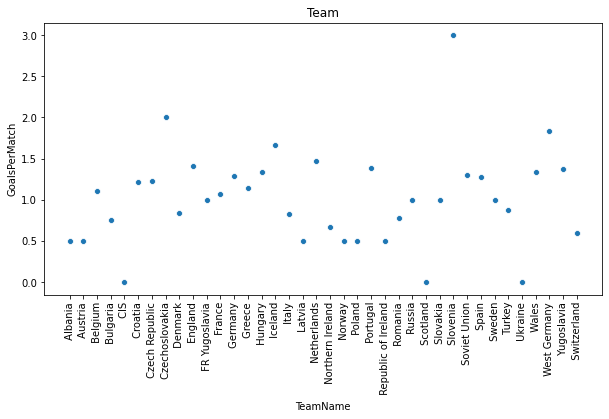

In [88]:
#Changing the size of graph
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df_ATG_grouped, x="TeamName", y="AwayTeamGoals")
#Giving the name for axis
ax.set_title('Team')
ax.set_ylabel('GoalsPerMatch')
#Showing the graph
plt.xticks(rotation=90)
plt.show()

#### Comments:
As we can see, there is avereage goals of each team per match. Some teams score more, some of them not so much. 

#### 5.4 Analyze home team goals per match
* We will prepare out table for scatterplot
* Visualizate it in scatterlot

In [87]:
#Preparing code and taking only goals and teams
df_HTG=df1[['HomeTeamGoals','HomeTeamName']]

#Grouping them by Team Name
df_HTG_grouped = df_HTG.groupby("HomeTeamName", as_index = False).mean().rename(columns={'HomeTeamName':'TeamName'})
print(df_HTG_grouped)

                TeamName  HomeTeamGoals
0               Albania        0.000000
1               Austria        0.250000
2               Belgium        1.500000
3              Bulgaria        0.500000
4                   CIS        1.000000
5               Croatia        1.333333
6        Czech Republic        1.272727
7        Czechoslovakia        1.333333
8               Denmark        1.357143
9               England        1.142857
10        FR Yugoslavia        3.000000
11               France        1.916667
12              Germany        1.470588
13               Greece        0.666667
14              Hungary        1.400000
15              Iceland        1.500000
16                Italy        1.200000
17               Latvia        0.000000
18          Netherlands        1.750000
19     Northern Ireland        0.000000
20               Norway        0.000000
21               Poland        0.800000
22             Portugal        1.411765
23  Republic of Ireland        0.750000


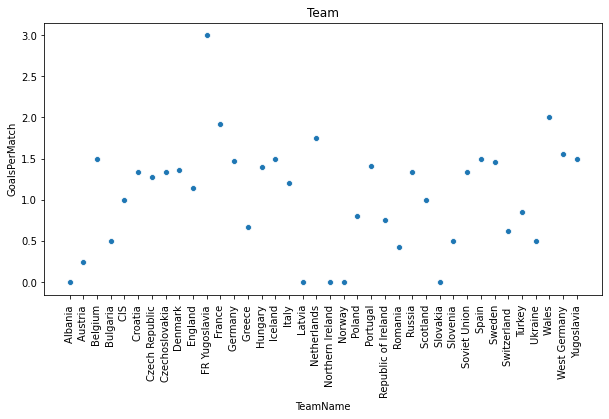

In [83]:
#Changing the size of graph
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df_HTG_grouped, x="TeamName", y="HomeTeamGoals")
#Giving the name for axis
ax.set_title('Team')
ax.set_ylabel('GoalsPerMatch')
#Showing the graph
plt.xticks(rotation=90)
plt.show()

#### Comments:
There ir Home goals, if we compare the two scatterplots, here some changes, so we can conclude that some teams plyas better when they are in motherland, other plays better out of their country.

#### 5.5 Analyze the most frequent positions
* We will prepare out table for barplot
* Visualizate it in barplot

In [127]:
#Create a dataframe for analyzing Positions
Pos_df = df2[["PlayerName(Captain)", "Position"]]

#Apply groupby on players to show only Position
Pos_grouped = Pos_df.groupby("Position", as_index = False).count()

Pos_grouped

,Position,PlayerName(Captain)
0,DF,1092
1,FW,725
2,GK,438
3,MF,1155


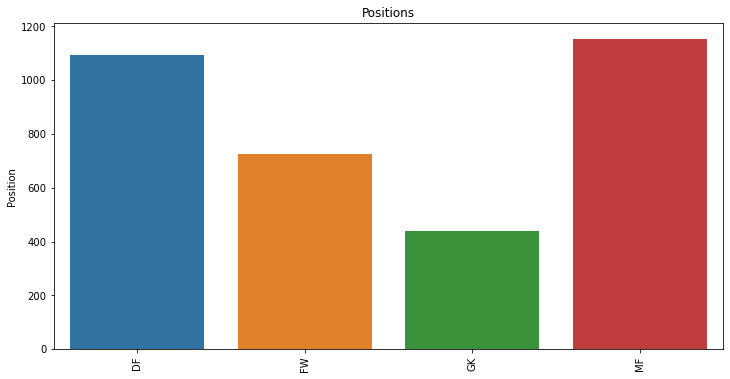

In [128]:
#Visualisation code
fig, ax = plt.subplots(figsize=(12,6))

#Plot barplot
sns.barplot(x="Position",y= "PlayerName(Captain)",data =Pos_grouped , ax=ax , ci=None)

#Set plot's characteristics
ax.set(xlabel='', ylabel='Position', title='Positions')

plt.xticks(rotation=90)
plt.show()

#### Comments:

As we can see, the most frequent position is midfielded and this is because of teams plays always at least 3 midfielders, while goalkeepers are usually maximum 3 for whole team. 

## Conclusion:


At the end, I can mark some findings in this project. 

As we can see, football popularity is only increasing and evidence is attendance which constantly increases. In addition, football is very intensive game if the most played number of Cups actually 4 and the best goalscorers are scored about 60 and more goals.

Motherland not so helpful for all teams, because there is some teams which scored the most goals away from their country. In addition, even if all young players wants to be forwards, the most useful position is midfielder.
